In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import mpmath as mp
import numpy as np
import scipy as sc
from mpl_toolkits import mplot3d
from array import *
from scipy.integrate import *
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from numpy.random import normal
from numpy import hstack

from statsmodels.distributions.empirical_distribution import ECDF
from matplotlib.ticker import FuncFormatter, MultipleLocator

!pip install pymannkendall
import pymannkendall as mk

plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams['figure.dpi'] = 100
# plt.rcParams['figure.figsize'] = [10.24, 7.6]
# plt.rcParams['figure.dpi'] = 300

In [2]:
naon = pd.read_csv("n_apr_jun.csv")
naop = pd.read_csv("p_apr_jun.csv")

In [3]:
naon


,Unnamed: 0,yymo,Unnamed: 0.1,Unnamed: 0.1.1,sno,yy,mo,dd,total_wl,precipitation,...,emp_skewv,nao_yymmo,nao_index,twl_max,prec_max,intensity,nint_twl_pcp,nint_twl_sflow,nint_sflow_ssurge,nint_pcp_ssurg
0,11,196805,27.0,1231.0,1232.0,1968.0,5.0,16.0,1.420,13.400,...,0.889838,196805.0,-0.79,1.6700,13.80,1.631710,1.631710,1.578223,1.714331,1.767818
1,42,197606,109.0,4168.0,4169.0,1976.0,6.0,13.0,1.740,22.900,...,0.980620,197606.0,-1.26,1.7400,53.50,1.921331,1.921331,1.824429,1.827617,1.924519
2,51,198204,163.0,6131.0,6132.0,1982.0,4.0,11.0,1.360,0.000,...,0.668622,198204.0,-0.70,1.7900,18.90,0.896404,0.896404,0.941859,0.950657,0.905202
3,69,199104,307.5,8628.0,8629.0,1991.0,4.0,15.0,1.680,0.350,...,0.990182,199104.0,-1.63,1.7350,18.60,1.386077,1.386077,1.212737,1.241489,1.414829
4,70,199105,309.0,8658.0,8659.0,1991.0,5.0,15.0,1.480,0.300,...,0.942496,199105.0,-1.65,1.7800,5.79,1.227400,1.227400,1.800395,1.913426,1.340431
5,71,199106,310.0,8688.0,8689.0,1991.0,6.0,14.0,1.690,0.300,...,0.979026,199106.0,-2.25,1.6900,7.27,1.363190,1.363190,1.943708,1.957478,1.376960
6,84,199904,488.5,11535.5,11536.5,1999.0,4.0,17.5,1.700,0.405,...,0.956872,199904.0,-1.85,1.7000,0.88,1.391145,1.391145,1.859684,1.849994,1.381455
7,107,200406,621.0,13351.0,13352.0,2004.0,6.0,4.0,1.653,3.500,...,0.903736,200406.0,-0.11,1.6530,7.07,1.634069,1.634069,1.815058,1.768265,1.587275
8,128,201006,720.0,15137.0,15138.0,2010.0,6.0,16.0,1.638,3.090,...,0.981066,201006.0,-0.79,1.7060,36.80,1.605572,1.605572,1.771644,1.808747,1.642675
9,137,201104,771.5,15423.0,15424.0,2011.0,4.0,3.0,1.669,4.450,...,0.995665,201104.0,-1.02,1.6995,24.90,1.672957,1.672957,1.229759,1.269476,1.712674


In [4]:
naop

,Unnamed: 0,yymo,Unnamed: 0.1,Unnamed: 0.1.1,sno,yy,mo,dd,total_wl,precipitation,...,emp_skewv,nao_yymmo,nao_index,twl_max,prec_max,intensity,pint_twl_pcp,pint_twl_sflow,pint_sflow_ssurge,pint_pcp_ssurg
0,5,197004,44.0,1924.0,1925.0,1970.0,4.0,9.0,1.6800,2.800,...,0.986102,197004.0,0.31,1.6800,52.000,1.616027,1.616027,1.103086,1.127757,1.640699
1,45,199204,337.0,8987.0,8988.0,1992.0,4.0,8.0,1.4900,0.000,...,0.901823,199204.0,0.55,1.7100,26.500,1.078031,1.078031,1.504080,1.564452,1.138404
2,48,199304,342.0,9351.0,9352.0,1993.0,4.0,7.0,1.6800,0.000,...,0.887543,199304.0,1.00,1.6800,0.510,1.198011,1.198011,1.033788,0.959901,1.124123
3,49,199306,343.5,9428.5,9429.5,1993.0,6.0,23.5,1.5450,33.350,...,0.975583,199306.0,2.05,1.7150,14.785,1.850663,1.850663,1.436759,1.527604,1.941508
4,56,199404,367.0,9738.0,9739.0,1994.0,4.0,29.0,1.5300,0.000,...,0.978707,199404.0,0.49,1.6800,4.420,1.115390,1.115390,1.720579,1.820477,1.215288
5,63,199605,406.0,10474.0,10475.0,1996.0,5.0,6.0,1.7300,0.000,...,0.971184,199605.0,2.13,1.7300,19.900,1.211781,1.211781,1.945620,1.941604,1.207765
6,70,199704,442.0,10817.0,10818.0,1997.0,4.0,23.0,1.6800,0.000,...,0.971184,199704.0,0.73,1.6800,6.460,1.198011,1.198011,1.776361,1.786115,1.207765
7,78,199804,471.0,11154.0,11155.0,1998.0,4.0,1.0,1.3100,0.510,...,0.888691,199804.0,0.03,1.7200,8.300,1.021102,1.021102,1.025692,1.344511,1.339921
8,84,200304,584.0,12938.8,12939.8,2003.0,4.0,15.8,1.6772,3.980,...,0.979153,200304.0,0.36,1.6996,9.842,1.455540,1.455540,1.483080,1.502754,1.475214
9,85,200305,587.5,12964.5,12965.5,2003.0,5.0,11.5,1.5190,2.125,...,0.963917,200305.0,0.21,1.6815,14.820,1.408963,1.408963,1.768520,1.879829,1.520273


In [5]:
# naon.groupby(naon.yymo).(['emp_pcp', 'emp_twl', 'emp_sflow', 'emp_skewv']).mean()
naon_avg=naon.groupby(naon.yymo).mean()
naon_avg

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,sno,yy,mo,dd,total_wl,precipitation,streamflow,...,emp_skewv,nao_yymmo,nao_index,twl_max,prec_max,intensity,nint_twl_pcp,nint_twl_sflow,nint_sflow_ssurge,nint_pcp_ssurg
yymo,,,,,,,,,,,,,,,,,,,,,
196805,11,27.0,1231.0,1232.0,1968.0,5.0,16.0,1.420,13.400,130.0,...,0.889838,196805.0,-0.79,1.6700,13.80,1.631710,1.631710,1.578223,1.714331,1.767818
197606,42,109.0,4168.0,4169.0,1976.0,6.0,13.0,1.740,22.900,145.0,...,0.980620,197606.0,-1.26,1.7400,53.50,1.921331,1.921331,1.824429,1.827617,1.924519
198204,51,163.0,6131.0,6132.0,1982.0,4.0,11.0,1.360,0.000,25.4,...,0.668622,198204.0,-0.70,1.7900,18.90,0.896404,0.896404,0.941859,0.950657,0.905202
199104,69,307.5,8628.0,8629.0,1991.0,4.0,15.0,1.680,0.350,23.0,...,0.990182,199104.0,-1.63,1.7350,18.60,1.386077,1.386077,1.212737,1.241489,1.414829
199105,70,309.0,8658.0,8659.0,1991.0,5.0,15.0,1.480,0.300,342.0,...,0.942496,199105.0,-1.65,1.7800,5.79,1.227400,1.227400,1.800395,1.913426,1.340431
199106,71,310.0,8688.0,8689.0,1991.0,6.0,14.0,1.690,0.300,375.0,...,0.979026,199106.0,-2.25,1.6900,7.27,1.363190,1.363190,1.943708,1.957478,1.376960
199904,84,488.5,11535.5,11536.5,1999.0,4.0,17.5,1.700,0.405,187.0,...,0.956872,199904.0,-1.85,1.7000,0.88,1.391145,1.391145,1.859684,1.849994,1.381455
200406,107,621.0,13351.0,13352.0,2004.0,6.0,4.0,1.653,3.500,159.0,...,0.903736,200406.0,-0.11,1.6530,7.07,1.634069,1.634069,1.815058,1.768265,1.587275
201006,128,720.0,15137.0,15138.0,2010.0,6.0,16.0,1.638,3.090,132.0,...,0.981066,201006.0,-0.79,1.7060,36.80,1.605572,1.605572,1.771644,1.808747,1.642675


In [6]:
naop_avg=naop.groupby(naop.yymo).mean()
naop_avg

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,sno,yy,mo,dd,total_wl,precipitation,streamflow,...,emp_skewv,nao_yymmo,nao_index,twl_max,prec_max,intensity,pint_twl_pcp,pint_twl_sflow,pint_sflow_ssurge,pint_pcp_ssurg
yymo,,,,,,,,,,,,,,,,,,,,,
197004,5,44.0,1924.0,1925.0,1970.0,4.0,9.0,1.6800,2.800,15.7,...,0.986102,197004.0,0.31,1.6800,52.000,1.616027,1.616027,1.103086,1.127757,1.640699
199204,45,337.0,8987.0,8988.0,1992.0,4.0,8.0,1.4900,0.000,72.0,...,0.901823,199204.0,0.55,1.7100,26.500,1.078031,1.078031,1.504080,1.564452,1.138404
199304,48,342.0,9351.0,9352.0,1993.0,4.0,7.0,1.6800,0.000,11.5,...,0.887543,199304.0,1.00,1.6800,0.510,1.198011,1.198011,1.033788,0.959901,1.124123
199306,49,343.5,9428.5,9429.5,1993.0,6.0,23.5,1.5450,33.350,53.4,...,0.975583,199306.0,2.05,1.7150,14.785,1.850663,1.850663,1.436759,1.527604,1.941508
199404,56,367.0,9738.0,9739.0,1994.0,4.0,29.0,1.5300,0.000,141.0,...,0.978707,199404.0,0.49,1.6800,4.420,1.115390,1.115390,1.720579,1.820477,1.215288
199605,63,406.0,10474.0,10475.0,1996.0,5.0,6.0,1.7300,0.000,340.0,...,0.971184,199605.0,2.13,1.7300,19.900,1.211781,1.211781,1.945620,1.941604,1.207765
199704,70,442.0,10817.0,10818.0,1997.0,4.0,23.0,1.6800,0.000,125.0,...,0.971184,199704.0,0.73,1.6800,6.460,1.198011,1.198011,1.776361,1.786115,1.207765
199804,78,471.0,11154.0,11155.0,1998.0,4.0,1.0,1.3100,0.510,41.4,...,0.888691,199804.0,0.03,1.7200,8.300,1.021102,1.021102,1.025692,1.344511,1.339921
200304,84,584.0,12938.8,12939.8,2003.0,4.0,15.8,1.6772,3.980,49.8,...,0.979153,200304.0,0.36,1.6996,9.842,1.455540,1.455540,1.483080,1.502754,1.475214


In [7]:
naon_avg['nint_twl_pcp']=   naon_avg['emp_pcp'] + naon_avg['emp_twl']          # 1) TWL and pcp
naon_avg['nint_twl_sflow']= naon_avg['emp_twl'] + naon_avg['emp_sflow']          # 2) TWL and streamflow 
naon_avg['nint_twl_ssurge']=naon_avg['emp_twl'] + naon_avg['emp_skewv']         # 3) TWL and skewsurge
naon_avg['nint_pcp_ssurg']= naon_avg['emp_pcp'] + naon_avg['emp_skewv']         #4) pcp and skewsurge

In [8]:
naop_avg['pint_twl_pcp']=   naop_avg['emp_pcp'] + naop_avg['emp_twl']           # 1) TWL and pcp
naop_avg['pint_twl_sflow']= naop_avg['emp_twl'] + naop_avg['emp_sflow']          # 2) TWL and streamflow 
naop_avg['pint_twl_ssurge']=naop_avg['emp_twl'] + naop_avg['emp_skewv']             # 3) TWL and skewsurge
naop_avg['pint_pcp_ssurg']= naop_avg['emp_pcp'] + naop_avg['emp_skewv']            #4) pcp and skewsurge

In [9]:
naon_avg

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,sno,yy,mo,dd,total_wl,precipitation,streamflow,...,nao_yymmo,nao_index,twl_max,prec_max,intensity,nint_twl_pcp,nint_twl_sflow,nint_sflow_ssurge,nint_pcp_ssurg,nint_twl_ssurge
yymo,,,,,,,,,,,,,,,,,,,,,
196805,11,27.0,1231.0,1232.0,1968.0,5.0,16.0,1.420,13.400,130.0,...,196805.0,-0.79,1.6700,13.80,1.631710,1.631710,1.578223,1.714331,1.767818,1.643568
197606,42,109.0,4168.0,4169.0,1976.0,6.0,13.0,1.740,22.900,145.0,...,197606.0,-1.26,1.7400,53.50,1.921331,1.921331,1.824429,1.827617,1.924519,1.958052
198204,51,163.0,6131.0,6132.0,1982.0,4.0,11.0,1.360,0.000,25.4,...,198204.0,-0.70,1.7900,18.90,0.896404,0.896404,0.941859,0.950657,0.905202,1.328446
199104,69,307.5,8628.0,8629.0,1991.0,4.0,15.0,1.680,0.350,23.0,...,199104.0,-1.63,1.7350,18.60,1.386077,1.386077,1.212737,1.241489,1.414829,1.951613
199105,70,309.0,8658.0,8659.0,1991.0,5.0,15.0,1.480,0.300,342.0,...,199105.0,-1.65,1.7800,5.79,1.227400,1.227400,1.800395,1.913426,1.340431,1.771962
199106,71,310.0,8688.0,8689.0,1991.0,6.0,14.0,1.690,0.300,375.0,...,199106.0,-2.25,1.6900,7.27,1.363190,1.363190,1.943708,1.957478,1.376960,1.944282
199904,84,488.5,11535.5,11536.5,1999.0,4.0,17.5,1.700,0.405,187.0,...,199904.0,-1.85,1.7000,0.88,1.391145,1.391145,1.859684,1.849994,1.381455,1.923435
200406,107,621.0,13351.0,13352.0,2004.0,6.0,4.0,1.653,3.500,159.0,...,200406.0,-0.11,1.6530,7.07,1.634069,1.634069,1.815058,1.768265,1.587275,1.854265
201006,128,720.0,15137.0,15138.0,2010.0,6.0,16.0,1.638,3.090,132.0,...,201006.0,-0.79,1.7060,36.80,1.605572,1.605572,1.771644,1.808747,1.642675,1.925029


In [10]:
naop_avg

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,sno,yy,mo,dd,total_wl,precipitation,streamflow,...,nao_yymmo,nao_index,twl_max,prec_max,intensity,pint_twl_pcp,pint_twl_sflow,pint_sflow_ssurge,pint_pcp_ssurg,pint_twl_ssurge
yymo,,,,,,,,,,,,,,,,,,,,,
197004,5,44.0,1924.0,1925.0,1970.0,4.0,9.0,1.6800,2.800,15.7,...,197004.0,0.31,1.6800,52.000,1.616027,1.616027,1.103086,1.127757,1.640699,1.947533
199204,45,337.0,8987.0,8988.0,1992.0,4.0,8.0,1.4900,0.000,72.0,...,199204.0,0.55,1.7100,26.500,1.078031,1.078031,1.504080,1.564452,1.138404,1.743274
199304,48,342.0,9351.0,9352.0,1993.0,4.0,7.0,1.6800,0.000,11.5,...,199304.0,1.00,1.6800,0.510,1.198011,1.198011,1.033788,0.959901,1.124123,1.848974
199306,49,343.5,9428.5,9429.5,1993.0,6.0,23.5,1.5450,33.350,53.4,...,199306.0,2.05,1.7150,14.785,1.850663,1.850663,1.436759,1.527604,1.941508,1.860321
199404,56,367.0,9738.0,9739.0,1994.0,4.0,29.0,1.5300,0.000,141.0,...,199404.0,0.49,1.6800,4.420,1.115390,1.115390,1.720579,1.820477,1.215288,1.857516
199605,63,406.0,10474.0,10475.0,1996.0,5.0,6.0,1.7300,0.000,340.0,...,199605.0,2.13,1.7300,19.900,1.211781,1.211781,1.945620,1.941604,1.207765,1.946385
199704,70,442.0,10817.0,10818.0,1997.0,4.0,23.0,1.6800,0.000,125.0,...,199704.0,0.73,1.6800,6.460,1.198011,1.198011,1.776361,1.786115,1.207765,1.932615
199804,78,471.0,11154.0,11155.0,1998.0,4.0,1.0,1.3100,0.510,41.4,...,199804.0,0.03,1.7200,8.300,1.021102,1.021102,1.025692,1.344511,1.339921,1.458562
200304,84,584.0,12938.8,12939.8,2003.0,4.0,15.8,1.6772,3.980,49.8,...,200304.0,0.36,1.6996,9.842,1.455540,1.455540,1.483080,1.502754,1.475214,1.938633


# 1) TWL and pcp (intensity) - neagtive phase

Mann_Kendall_Test(trend='no trend', h=False, p=0.37109336952269745, z=0.8944271909999159, Tau=0.24444444444444444, s=11.0, var_s=125.0, slope=0.04389901820000004, intercept=1.3008128268499999)


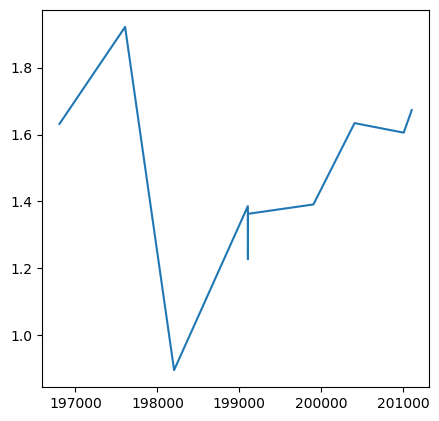

In [11]:
plt.plot(naon_avg.nao_yymmo,naon_avg.nint_twl_pcp)
result = mk.original_test(naon_avg.nint_twl_pcp)
print(result) #nint_twl_pcp	nint_twl_sflow	nint_twl_ssurge	nint_pcp_ssurg, nint_pcp_ssurg

# 2) TWL and streamflow (intensity) - neagtive phase

Mann_Kendall_Test(trend='no trend', h=False, p=0.8580276569875211, z=0.17888543819998318, Tau=0.06666666666666667, s=3.0, var_s=125.0, slope=0.004887585333333444, intercept=1.7640252459999994)


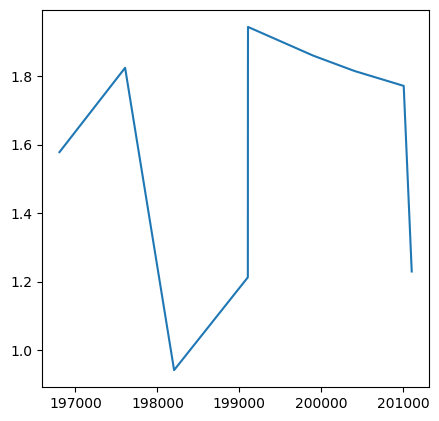

In [12]:
plt.plot(naon_avg.nao_yymmo,naon_avg.nint_twl_sflow)
result = mk.original_test(naon_avg.nint_twl_sflow)
print(result) #nint_twl_pcp	nint_twl_sflow	nint_twl_ssurge	nint_pcp_ssurg

# 3) TWL and skewsurge (intensity) - neagtive phase

Mann_Kendall_Test(trend='no trend', h=False, p=0.5295988084250074, z=0.6286185570937122, Tau=0.17777777777777778, s=8.0, var_s=124.0, slope=0.026584214999999745, intercept=1.8046028315000013)


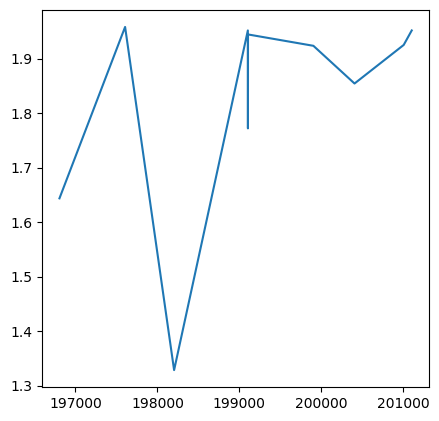

In [13]:
plt.plot(naon_avg.nao_yymmo, naon_avg.nint_twl_ssurge)
result = mk.original_test(naon_avg.nint_twl_ssurge)
print(result) #nint_twl_pcp	nint_twl_sflow	nint_twl_ssurge	nint_pcp_ssurg

# 4) pcp and skewsurge (intensity) - neagtive phase

Mann_Kendall_Test(trend='no trend', h=False, p=0.5915050369949166, z=0.5366563145999494, Tau=0.15555555555555556, s=7.0, var_s=125.0, slope=0.043111692000000035, intercept=1.307049279)


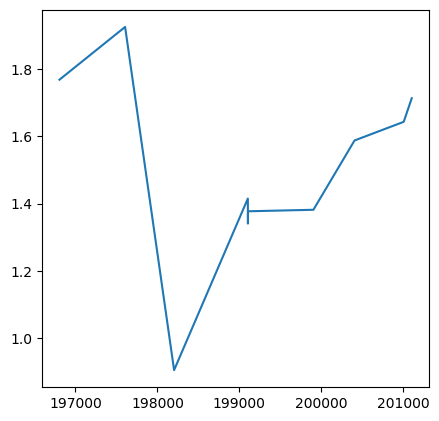

In [14]:
plt.plot(naon_avg.nao_yymmo,naon_avg.nint_pcp_ssurg)
result = mk.original_test(naon_avg.nint_pcp_ssurg)
print(result) #nint_twl_pcp	nint_twl_sflow	nint_twl_ssurge	nint_pcp_ssurg

# 1)TWL and pcp (intensity) - positive phase

Mann_Kendall_Test(trend='no trend', h=False, p=1.0, z=0, Tau=0.0, s=0.0, var_s=124.0, slope=0.0, intercept=1.2048960855)


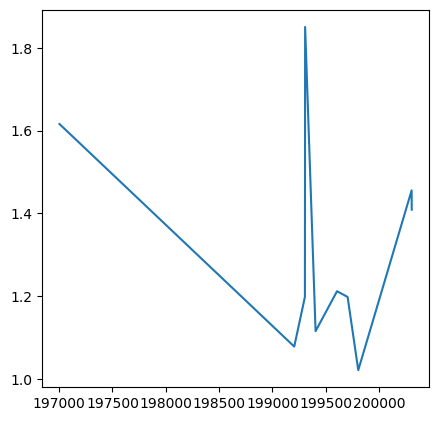

In [15]:
plt.plot(naop_avg.nao_yymmo,naop_avg.pint_twl_pcp)
result = mk.original_test(naop_avg.pint_twl_pcp)
print(result) #pint_twl_pcp	pint_twl_sflow	pint_twl_ssurge	pint_pcp_ssurg

# 2)TWL and streamflow (intensity)- positive phase

Mann_Kendall_Test(trend='no trend', h=False, p=0.37109336952269745, z=0.8944271909999159, Tau=0.24444444444444444, s=11.0, var_s=125.0, slope=0.05445620299999998, intercept=1.2485273489000002)


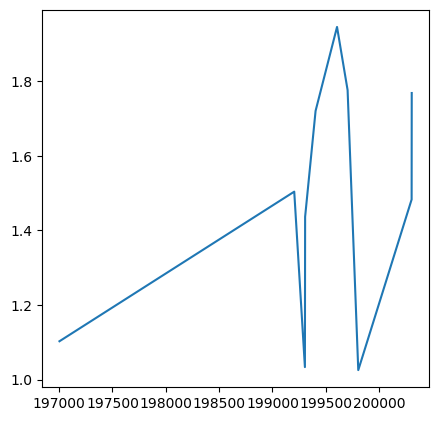

In [16]:
plt.plot(naop_avg.nao_yymmo,naop_avg.pint_twl_sflow)
result = mk.original_test(naop_avg.pint_twl_sflow)
print(result) #pint_twl_pcp	pint_twl_sflow	pint_twl_ssurge	pint_pcp_ssurg

# 3) TWL and skewsurge (intensity) - positive phase

Mann_Kendall_Test(trend='no trend', h=False, p=0.8580276569875211, z=-0.17888543819998318, Tau=-0.06666666666666667, s=-3.0, var_s=125.0, slope=-0.0011124569999999834, intercept=1.86392483725)


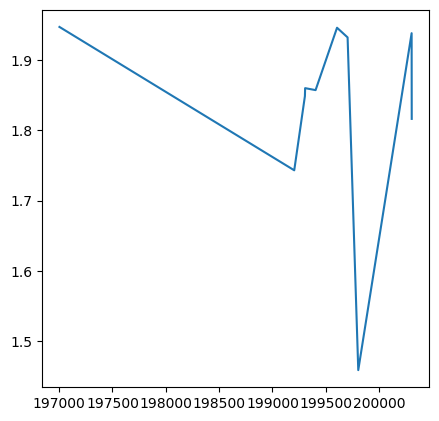

In [17]:
plt.plot(naop_avg.nao_yymmo,naop_avg.pint_twl_ssurge)
result = mk.original_test(naop_avg.pint_twl_ssurge)
print(result) #pint_twl_pcp	pint_twl_sflow	pint_twl_ssurge	pint_pcp_ssurg

# 4) pcp and skewsurge (intensity) - positive phase

Mann_Kendall_Test(trend='no trend', h=False, p=0.41896172515934094, z=0.8082238591204871, Tau=0.2222222222222222, s=10.0, var_s=124.0, slope=0.027880487999999943, intercept=1.1521420370000004)


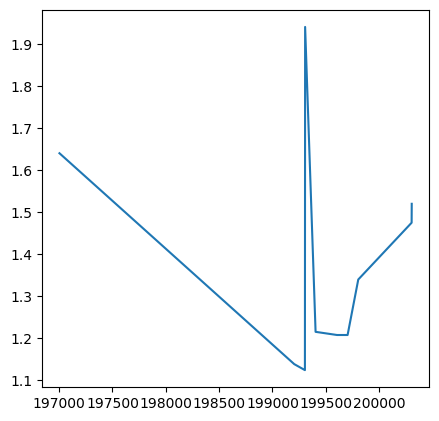

In [18]:
plt.plot(naop_avg.nao_yymmo,naop_avg.pint_pcp_ssurg)
result = mk.original_test(naop_avg.pint_pcp_ssurg)
print(result) #pint_twl_pcp	pint_twl_sflow	pint_twl_ssurge	pint_pcp_ssurg

# 1)TWL and pcp (intensity) - negative phase - correlation

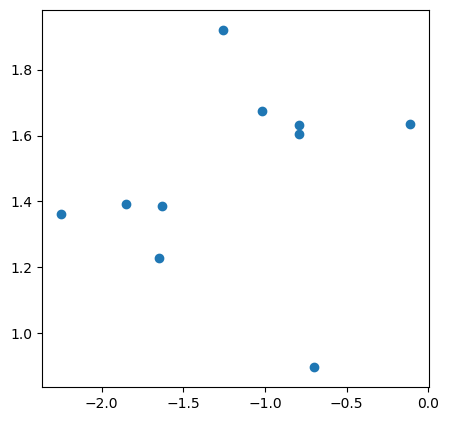

Kendall correlation coefficient: 0.180
Samples are uncorrelated (fail to reject H0) p=0.472


In [19]:
plt.scatter(naon_avg.nao_index,naon_avg.nint_twl_pcp)
plt.show()
coef, p = kendalltau(naon_avg.nao_index,naon_avg.nint_twl_pcp)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  # null hypothesis H0 states that there is no effect or relationship between the variables.

# 2) TWL and streamflow (intensity) - neagtive phase - correlation

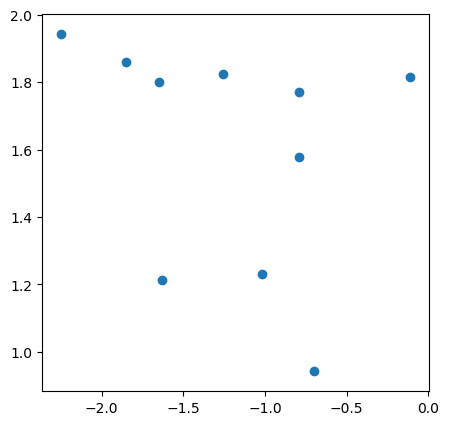

Kendall correlation coefficient: -0.405
Samples are uncorrelated (fail to reject H0) p=0.106


In [20]:
plt.scatter(naon_avg.nao_index,naon_avg.nint_twl_sflow)
plt.show()
coef, p = kendalltau(naon_avg.nao_index,naon_avg.nint_twl_sflow)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  # null hypothesis H0 states that there is no effect or relationship between the variables.

# 3) TWL and skewsurge (intensity) - neagtive phase - correlation

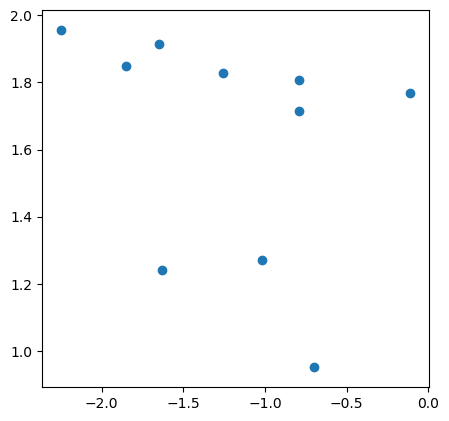

Kendall correlation coefficient: -0.494
Samples are correlated (reject H0) p=0.048


In [21]:
plt.scatter(naon_avg.nao_index,naon_avg.nint_sflow_ssurge)
plt.show()
coef, p = kendalltau(naon_avg.nao_index,naon_avg.nint_sflow_ssurge)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  # null hypothesis H0 states that there is no effect or relationship between the variables.

# 4) pcp and skewsurge (intensity) - neagtive phase - correlation

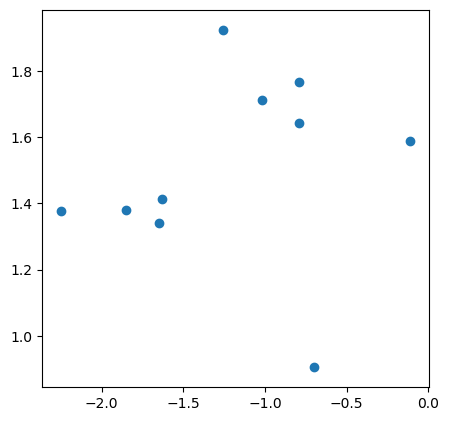

Kendall correlation coefficient: 0.180
Samples are uncorrelated (fail to reject H0) p=0.472


In [22]:
plt.scatter(naon_avg.nao_index,naon_avg.nint_pcp_ssurg)
plt.show()
coef, p = kendalltau(naon_avg.nao_index,naon_avg.nint_pcp_ssurg)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  # null hypothesis H0 states that there is no effect or relationship between the variables.

# 1)TWL and pcp (intensity) - positive phase- correlation

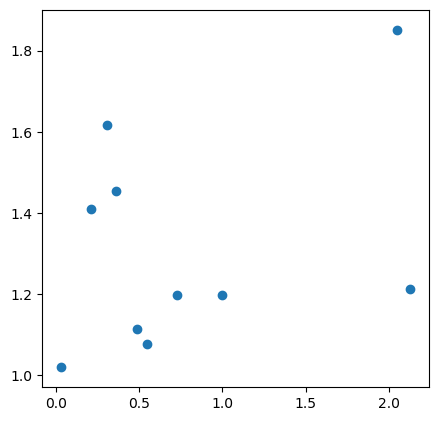

Kendall correlation coefficient: 0.180
Samples are uncorrelated (fail to reject H0) p=0.472


In [23]:
plt.scatter(naop_avg.nao_index,naop_avg.pint_twl_pcp)
plt.show()
coef, p = kendalltau(naop_avg.nao_index,naop_avg.pint_twl_pcp)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  # null hypothesis H0 states that there is no effect or relationship between the variables.

# 2)TWL and streamflow (intensity)- positive phase- correlation

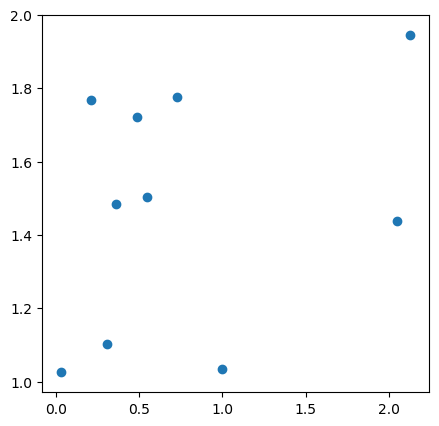

Kendall correlation coefficient: 0.289
Samples are uncorrelated (fail to reject H0) p=0.291


In [24]:
plt.scatter(naop_avg.nao_index,naop_avg.pint_twl_sflow)
plt.show()
coef, p = kendalltau(naop_avg.nao_index,naop_avg.pint_twl_sflow)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  # null hypothesis H0 states that there is no effect or relationship between the variables.

# 3) TWL and skewsurge (intensity) - positive phase- correlation

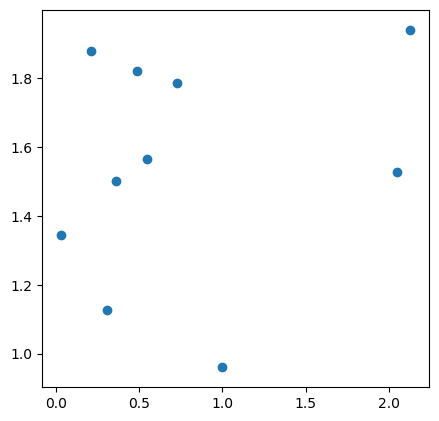

Kendall correlation coefficient: 0.156
Samples are uncorrelated (fail to reject H0) p=0.601


In [25]:
plt.scatter(naop_avg.nao_index,naop_avg.pint_sflow_ssurge)
plt.show()
coef, p = kendalltau(naop_avg.nao_index,naop_avg.pint_sflow_ssurge)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  # null hypothesis H0 states that there is no effect or relationship between the variables.

# 4) pcp and skewsurge (intensity) - positive phase- correlation

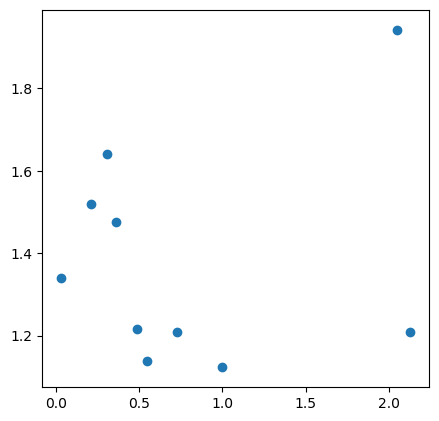

Kendall correlation coefficient: -0.315
Samples are uncorrelated (fail to reject H0) p=0.209


In [26]:
plt.scatter(naop_avg.nao_index,naop_avg.pint_pcp_ssurg)
plt.show()
coef, p = kendalltau(naop_avg.nao_index,naop_avg.pint_pcp_ssurg)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  # null hypothesis H0 states that there is no effect or relationship between the variables.

In [27]:
# naon_avg.to_csv('naon_avg.csv')
# naop_avg.to_csv('naop_avg.csv')